In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")

# Detailed EDA (Exploratory Data Analysis)
print("Dataset shape:", df.shape)  # Check the shape of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Check for basic statistical summary
print("\nStatistical Summary:")
print(df.describe())

Dataset shape: (569, 12)

First 5 rows of the dataset:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension  diagnosis_encoded  diagnosis_B  diagnosis_M  
0    0.2419            0.07871                  1            0            1  
1    0.1812            0.05667                  1            0            1  
2    0.2069            0.05999                  1            0            1  
3    0.2597            0.09744                  1            0            1  
4    0.1809            0.05883                  1            0            1  

Missing value

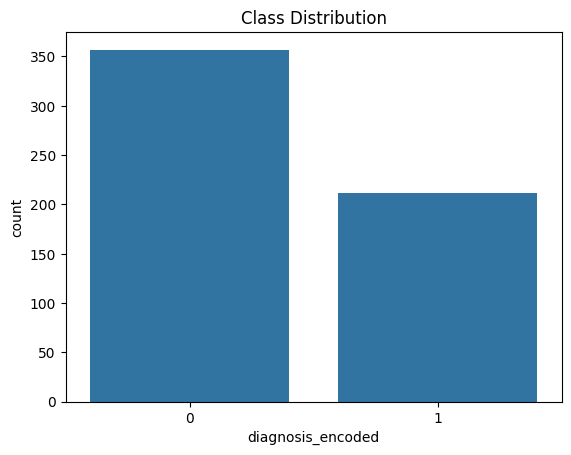

In [25]:
# Visualizing class distribution
sns.countplot(x='diagnosis_encoded', data=df)
plt.title('Class Distribution')
plt.show()

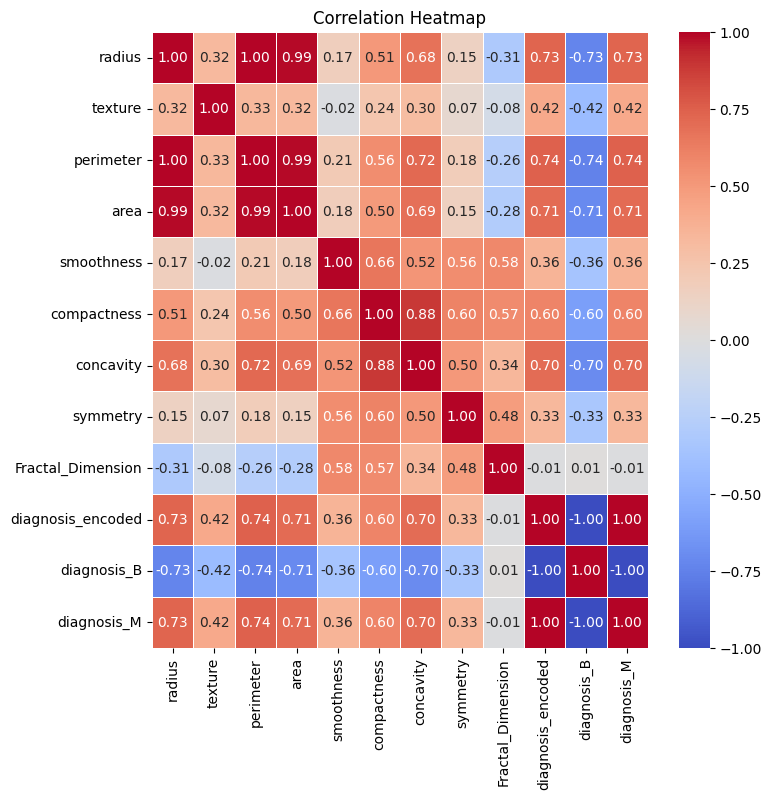

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 600x800 with 0 Axes>

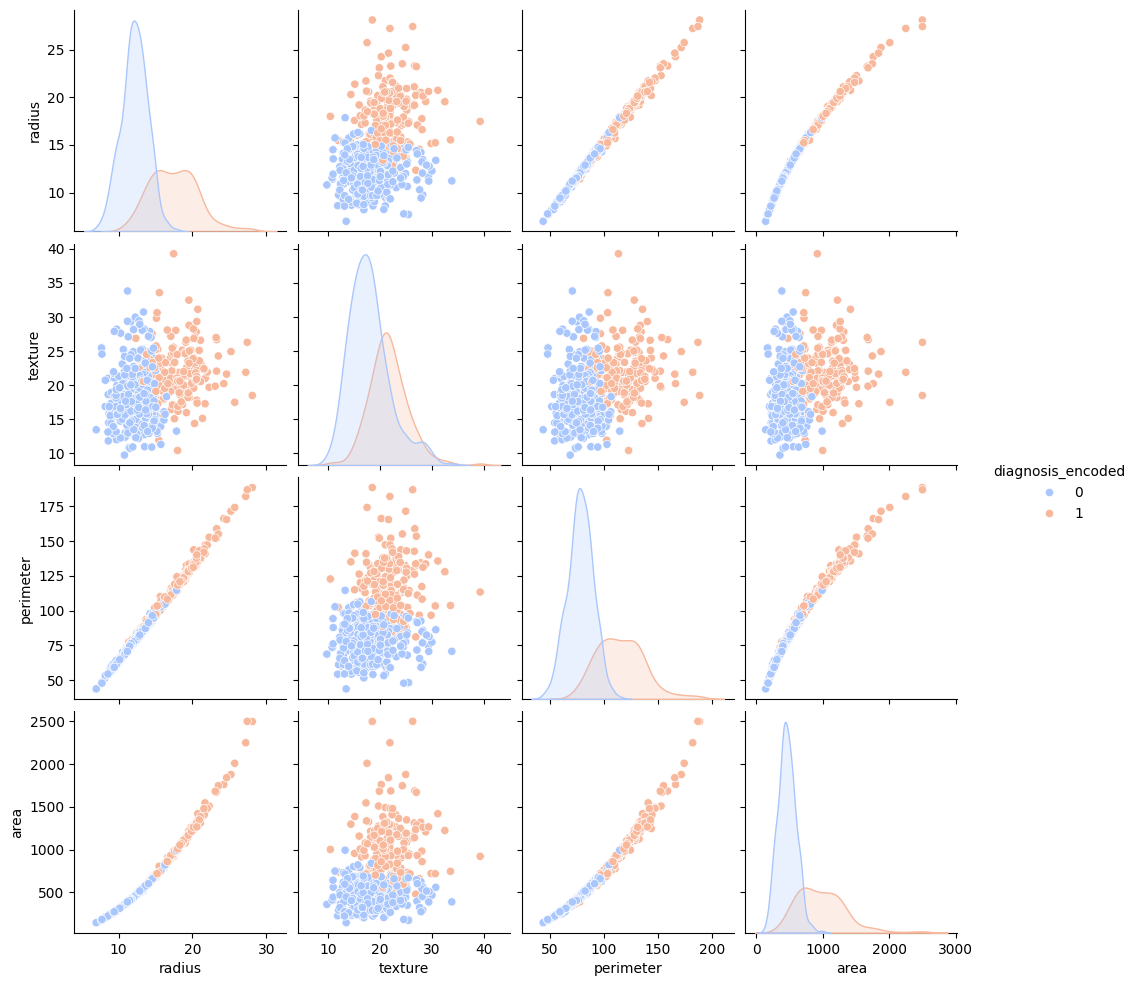

In [23]:
# Visualizing specific features using pairplot
features_to_plot = ['radius', 'texture', 'perimeter', 'area', 'diagnosis_encoded']
plt.figure(figsize=(6, 8))
sns.pairplot(df[features_to_plot], hue='diagnosis_encoded', palette='coolwarm')
plt.show()

In [5]:
# Separating features and target variable
X = df.drop(['diagnosis_encoded', 'diagnosis_B', 'diagnosis_M'], axis=1)  # Features
y = df['diagnosis_encoded']  # Target variable

# Standardizing the feature values (important for Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting on the test set
y_pred_gnb = gnb.predict(X_test)

# Accuracy score for Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy_gnb * 100:.2f}%")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))


Accuracy of Gaussian Naive Bayes: 95.61%
Accuracy: 0.956140350877193
Confusion Matrix:
 [[71  0]
 [ 5 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
print("Negative values in X_train:", (X_train < 0).any().any())
print("Negative values in X_test:", (X_test < 0).any().any())

Negative values in X_train: True
Negative values in X_test: True


In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Apply MinMaxScaler on X_train
scaler = MinMaxScaler()
X_train_non_neg = scaler.fit_transform(X_train)

# Apply the same transformation on X_test
X_test_non_neg = scaler.transform(X_test)

# Clip the values in X_test to ensure they are >= 0
X_test_non_neg = np.clip(X_test_non_neg, a_min=0, a_max=None)

# Confirm there are no negative values
print("Negative values in X_train:", (X_train_non_neg < 0).any().any())
print("Negative values in X_test:", (X_test_non_neg < 0).any().any())

Negative values in X_train: False
Negative values in X_test: False


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_non_neg, y_train)

# Predict on test data
y_pred_mnb = mnb.predict(X_test_non_neg)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_mnb * 100:.2f}%")

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[71  0]
 [38  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        71
           1       1.00      0.12      0.21        43

    accuracy                           0.67       114
   macro avg       0.83      0.56      0.50       114
weighted avg       0.78      0.67      0.57       114

Accuracy of Multinomial Naive Bayes: 66.67%


In [13]:
# Cross-validation scores for both models
cv_scores_gnb = cross_val_score(gnb, X_train_non_neg, y_train, cv=5, scoring='accuracy')
cv_scores_mnb = cross_val_score(mnb, X_train_non_neg, y_train, cv=5, scoring='accuracy')

# Displaying Cross-Validation scores
print(f"Cross-validation scores for Gaussian Naive Bayes: {cv_scores_gnb}")
print(f"Cross-validation scores for Multinomial Naive Bayes: {cv_scores_mnb}")

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\nConfusion Matrix for Gaussian Naive Bayes:")
print(cm_gnb)

# Confusion Matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nConfusion Matrix for Multinomial Naive Bayes:")
print(cm_mnb)

Cross-validation scores for Gaussian Naive Bayes: [0.89010989 0.91208791 0.93406593 0.87912088 0.89010989]
Cross-validation scores for Multinomial Naive Bayes: [0.65934066 0.64835165 0.67032967 0.62637363 0.65934066]

Confusion Matrix for Gaussian Naive Bayes:
[[71  0]
 [ 5 38]]

Confusion Matrix for Multinomial Naive Bayes:
[[71  0]
 [38  5]]


In [14]:
# Accuracy for both models
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print(f"\nAccuracy of Gaussian Naive Bayes: {accuracy_gnb * 100:.2f}%")
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_mnb * 100:.2f}%")

# Classification Report for Multinomial Naive Bayes
print("\nClassification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_mnb))

# You can also output the classification report for Gaussian Naive Bayes if needed
print("\nClassification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb))


Accuracy of Gaussian Naive Bayes: 95.61%
Accuracy of Multinomial Naive Bayes: 66.67%

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        71
           1       1.00      0.12      0.21        43

    accuracy                           0.67       114
   macro avg       0.83      0.56      0.50       114
weighted avg       0.78      0.67      0.57       114


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



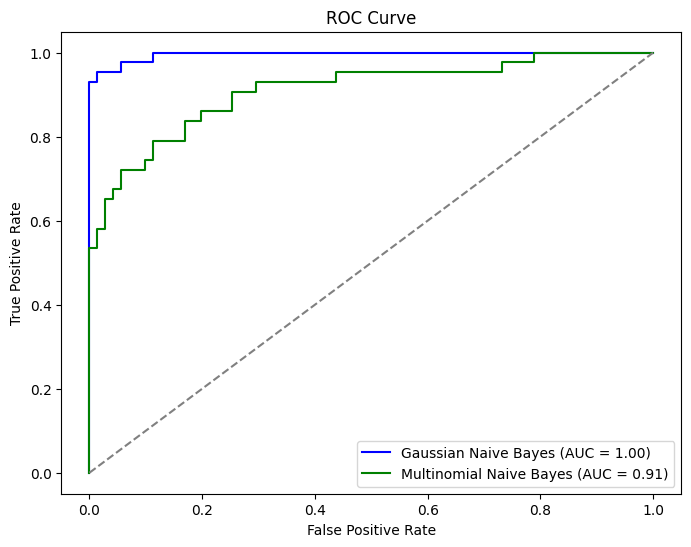

In [15]:
# ROC curve and AUC for both models
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:, 1])

roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'Multinomial Naive Bayes (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Interpretation of the models:

# Gaussian Naive Bayes (GNB) and Multinomial Naive Bayes (MNB) are both used to classify the dataset.

# - Gaussian Naive Bayes (GNB) works well with continuous data, assuming the features follow a Gaussian (normal) distribution.
#   It is suitable when the features are real-valued and need to approximate continuous probabilities.

# - Multinomial Naive Bayes (MNB) works best with discrete data, such as count-based features (e.g., word counts in text data).
#   However, MNB can still handle continuous features if they are transformed appropriately, such as scaling or normalization.

# - Both models are compared based on:
#   1. Accuracy scores: These provide an overview of how well the models generalize to unseen data.
#   2. Confusion matrices: These evaluate model predictions by showing the number of correct and incorrect predictions for each class.
#   3. ROC-AUC: The ROC curve (Receiver Operating Characteristic) helps evaluate the trade-off between true positives (TPR) 
#      and false positives (FPR). The AUC (Area Under the Curve) quantifies the model's overall performance.

# - Accuracy alone does not provide the full picture, especially when dealing with imbalanced datasets.
#   The ROC-AUC metric is particularly important as it evaluates the model's performance across different probability thresholds.

# - By examining the results from accuracy scores, confusion matrices, and ROC-AUC:
#   We can determine which model (GNB or MNB) provides better performance for our breast cancer dataset.